In [148]:
import os
import sys
from datetime import datetime
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, gaussian_kde
from statsmodels.distributions.empirical_distribution import ECDF

# Add the parent directory of current directory to the Python path
sys.path.insert(0, os.path.abspath('..'))

from src.utils.process_session import *
from src.utils.optostim import *

In [114]:
# metadata
Experiment = "test_data"
Animals = ["SP111", "SP112"]
Group = ["Control", "Control"]
Path_To_Raw_Data = "/home/sthitapati/Documents/sequence_data/bpod_raw_data"
Camera_Folder = "/home/sthitapati/Documents/sequence_data/SP_FlyCap"
Output_Folder = "/home/sthitapati/Documents/sequence_data/output"


In [115]:
current_animal = Animals[1]
# print(current_animal)

all_sessions_file_name = os.path.join(Output_Folder, current_animal, f'{current_animal}_transition_data_all_sessions.csv')
print(all_sessions_file_name)


/home/sthitapati/Documents/sequence_data/output/SP112/SP112_transition_data_all_sessions.csv


In [116]:
allsessions_DF = pd.read_csv(all_sessions_file_name)
allsessions_DF.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,opto_stimulated_port,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group
0,0,1,22,2,2,122.5270,122.5454,123.8857,123.9791,1.3403,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-04-21,Fri,SP112,Control
1,1,1,22,2,2,123.8857,123.9791,124.0053,124.0335,0.0262,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-04-21,Fri,SP112,Control
2,2,1,22,2,2,124.0053,124.0335,124.0566,124.3226,0.0231,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-04-21,Fri,SP112,Control
3,3,1,22,2,2,124.0566,124.3226,124.3291,124.3915,0.0065,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-04-21,Fri,SP112,Control
4,4,1,21,2,1,124.3291,124.3915,134.7244,134.7446,10.3329,...,NaN,1,"[90.0, 90.0, 90.0, 90.0]","[5.0, 5.0, 5.0, 5.0]",1,0,2023-04-21,Fri,SP112,Control


In [117]:
# get session settings

sessions_df = get_session_settings(Output_Folder, current_animal)
sessions_df.head()

,session_id,session,date,file_number,day,opto_session,experiment_type
0,0,00_20230421_115325_Fri,2023-04-21,115325,Fri,False,1_Training
1,1,01_20230422_151343_Sat,2023-04-22,151343,Sat,False,1_Training
2,2,02_20230423_184215_Sun,2023-04-23,184215,Sun,False,1_Training
3,3,03_20230424_135300_Mon,2023-04-24,135300,Mon,False,1_Training
4,4,04_20230425_134800_Tue,2023-04-25,134800,Tue,False,1_Training


In [118]:
# get list of all sessions with opto_stim

opto_session_ids = get_opto_sessions(sessions_df)
print(opto_session_ids)

[36, 37, 38, 39, 40, 41, 42, 43, 45]


In [119]:
# make a dataframe by filtering for opto sessions with allsessions_DF['session_id'] = opto_session_ids

opto_df = allsessions_DF[allsessions_DF['session_id'].isin(opto_session_ids)]
opto_df.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,opto_stimulated_port,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group
118533,0,1,26,2,6,36.2121,36.6108,36.9676,36.9959,0.3568,...,2.0,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13421,36,2023-07-11,Tue,SP112,Control
118534,1,1,66,6,6,36.9676,36.9959,37.0260,37.2329,0.0301,...,2.0,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13421,36,2023-07-11,Tue,SP112,Control
118535,2,1,66,6,6,37.0260,37.2329,37.2395,37.2459,0.0066,...,2.0,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13421,36,2023-07-11,Tue,SP112,Control
118536,3,1,63,6,3,37.2395,37.2459,37.6719,37.7833,0.4260,...,2.0,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13421,36,2023-07-11,Tue,SP112,Control
118537,4,1,37,3,7,37.6719,37.7833,38.0772,38.3069,0.2939,...,2.0,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13421,36,2023-07-11,Tue,SP112,Control


In [120]:
# info

opto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32481 entries, 118533 to 154967
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     32481 non-null  int64  
 1   trial_id                       32481 non-null  int64  
 2   transition_type                32481 non-null  int64  
 3   start_poke_port                32481 non-null  int64  
 4   end_poke_port                  32481 non-null  int64  
 5   start_poke_in_timestamp        32481 non-null  float64
 6   start_poke_out_timestamp       32481 non-null  float64
 7   end_poke_in_timestamp          32481 non-null  float64
 8   end_poke_out_timestamp         32475 non-null  float64
 9   out_in_latency                 32481 non-null  float64
 10  in_in_latency                  32481 non-null  float64
 11  repeat_filter                  32481 non-null  int64  
 12  2s_time_filter_out_in          32481 non

In [121]:
# Count the occurrences of each unique value in 'opto_condition'
opto_condition_counts = opto_df['opto_condition'].value_counts()
print('summary of opto-transitions \n', opto_condition_counts)

# Count the occurrences of each unique value in 'opto_stimulated_port'
opto_stimulated_port_counts = opto_df['opto_stimulated_port'].value_counts()
print('specific ports \n', opto_stimulated_port_counts)

summary of opto-transitions 
 1.0    3960
Name: opto_condition, dtype: int64
specific ports 
 2.0    1050
1.0    1000
4.0     965
3.0     945
Name: opto_stimulated_port, dtype: int64


In [122]:
# count number of control trials
nan_counts_opto_condition = opto_df['opto_condition'].isna().sum()
print('opto_stim', nan_counts_opto_condition)

nan_counts_opto_stimulated_port = opto_df['opto_stimulated_port'].isna().sum()
print('all_ports', nan_counts_opto_stimulated_port)

opto_stim 28521
all_ports 28521


In [123]:
# now just look at control data and develop plotting functionality

control_df = opto_df[opto_df['opto_condition'].isna()]
control_df.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,opto_stimulated_port,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group
118541,8,2,16,1,6,39.6320,39.6880,40.2369,40.3083,0.5489,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118542,9,2,63,6,3,40.2369,40.3083,40.6669,41.0318,0.3586,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118543,10,2,37,3,7,40.6669,41.0318,41.3113,41.4741,0.2795,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118544,11,2,72,7,2,41.3113,41.4741,42.2490,42.4246,0.7749,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118545,12,2,21,2,1,42.2490,42.4246,42.7294,42.7822,0.3048,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control


In [124]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28521 entries, 118541 to 154967
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28521 non-null  int64  
 1   trial_id                       28521 non-null  int64  
 2   transition_type                28521 non-null  int64  
 3   start_poke_port                28521 non-null  int64  
 4   end_poke_port                  28521 non-null  int64  
 5   start_poke_in_timestamp        28521 non-null  float64
 6   start_poke_out_timestamp       28521 non-null  float64
 7   end_poke_in_timestamp          28521 non-null  float64
 8   end_poke_out_timestamp         28515 non-null  float64
 9   out_in_latency                 28521 non-null  float64
 10  in_in_latency                  28521 non-null  float64
 11  repeat_filter                  28521 non-null  int64  
 12  2s_time_filter_out_in          28521 non

In [125]:
control_df.groupby(['end_poke_port', 'start_poke_port']).size().unstack()

start_poke_port,1,2,3,4,5,6,7,8
end_poke_port,,,,,,,,
1,1790.0,3495.0,75.0,6.0,3.0,283.0,287.0,NaN
2,436.0,803.0,216.0,3.0,10.0,443.0,3428.0,2.0
3,366.0,282.0,1043.0,14.0,5.0,3744.0,511.0,5.0
4,4.0,4.0,3.0,1.0,1.0,4.0,7.0,3.0
5,19.0,8.0,NaN,1.0,12.0,3.0,1.0,NaN
6,3332.0,554.0,585.0,NaN,12.0,1603.0,256.0,1.0
7,21.0,49.0,4100.0,NaN,NaN,312.0,349.0,4.0
8,NaN,NaN,1.0,3.0,NaN,2.0,9.0,7.0


In [126]:
# Create mapping from old port numbers to new names
port_mapping = {2: 'port 1', 1: 'port 2', 6: 'port 3', 3: 'port 4', 7: 'port 5'}

# If there are other ports not included in the correct sequence, map them to X, Y, Z
# Note: replace 4, 5, 8 with actual port numbers if different
port_mapping.update({4: 'port X', 5: 'port Y', 8: 'port Z'})

In [127]:
def plot_transition_matrix(df, normalize=False, display_numbers=False, additional_title=None, ax=None):
    # Create a copy of df
    df_copy = df.copy()

    # Mapping dictionary
    port_mapping = {2: 'port 1', 1: 'port 2', 6: 'port 3', 3: 'port 4', 7: 'port 5',
                    4: 'port X', 5: 'port Y', 8: 'port Z'}

    # Apply mapping to start_poke_port and end_poke_port
    df_copy['start_poke_port'] = df_copy['start_poke_port'].map(port_mapping)
    df_copy['end_poke_port'] = df_copy['end_poke_port'].map(port_mapping)

    # Group by end and start port and count the number of each transition
    transition_counts = df_copy.groupby(['end_poke_port', 'start_poke_port']).size().unstack(fill_value=0)

    # Reorder the columns and rows
    ordered_ports = ['port 1', 'port 2', 'port 3', 'port 4', 'port 5', 'port X', 'port Y', 'port Z']
    transition_counts = transition_counts.reindex(index=ordered_ports[::-1], columns=ordered_ports)

    # Convert to numpy array for easier manipulation and replace np.nan with 0
    transition_counts = np.nan_to_num(transition_counts.values)

    if normalize:
        # Normalize rows to get transition probabilities
        row_sums = transition_counts.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1e-10  # replace 0 sums with a small number to avoid division by zero
        transition_counts = transition_counts / row_sums
        colorbar_label = 'Transition Probabilities'
        title = 'State Transition Matrix'
    else:
        colorbar_label = 'Number of Transitions'
        title = 'Absolute Transition Matrix'

    # Add the additional title if specified by the user
    if additional_title:
        title = title + '\n' + additional_title

    # If no Axes object was provided, create a new one
    if ax is None:
        ax = plt.gca() # If no ax provided, use the current axes

    # Plotting transition matrix, only select first 4 columns (Start Ports 1 to 4)
    sns.heatmap(transition_counts[:, :4], annot=display_numbers, cmap='YlGnBu', vmin=0, vmax=0.9,
                xticklabels=['port 1', 'port 2', 'port 3', 'port 4'], 
                yticklabels=['port Z', 'port Y', 'port X', 'port 5', 'port 4', 'port 3', 'port 2', 'port 1'])
    ax.set_title(title)
    ax.set_xlabel('Start Port')
    ax.set_ylabel('End Port')
    ax.set_aspect('equal')  # set aspect ratio

    # Add a colorbar with label
    cbar = ax.collections[0].colorbar
    cbar.set_label(colorbar_label)

    # set dpi to 300 to get a higher resolution
    save_path = os.path.join(Output_Folder, current_animal, 'plots', f'{additional_title}_heatmap.png')

    # Ensure the directory exists
    os.makedirs(os.path.join(Output_Folder, current_animal, 'plots'), exist_ok=True)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)

    plt.show()


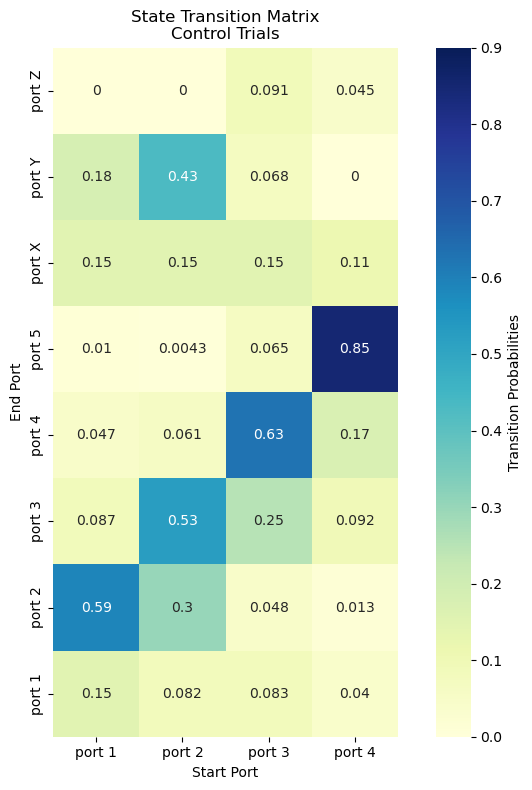

In [128]:

fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(control_df, normalize=True, display_numbers=True, additional_title= 'Control Trials')

In [129]:
# set colorbar value range 0-0.9
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.9])
optostim_port_1 = opto_df[opto_df['opto_stimulated_port'] == 1]
optostim_port_2 = opto_df[opto_df['opto_stimulated_port'] == 2]
optostim_port_3 = opto_df[opto_df['opto_stimulated_port'] == 3]
optostim_port_4 = opto_df[opto_df['opto_stimulated_port'] == 4]


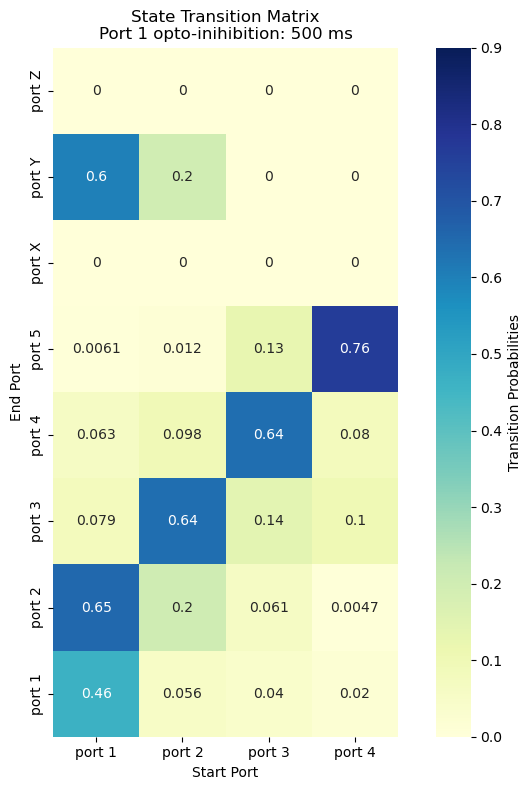

In [130]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_1, normalize=True, display_numbers=True, additional_title= 'Port 1 opto-inihibition: 500 ms')


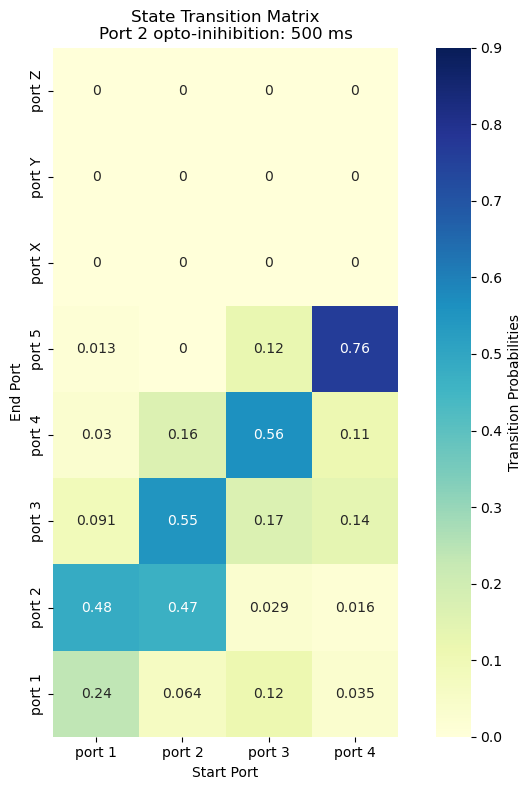

In [131]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_2, normalize=True, display_numbers=True, additional_title= 'Port 2 opto-inihibition: 500 ms')

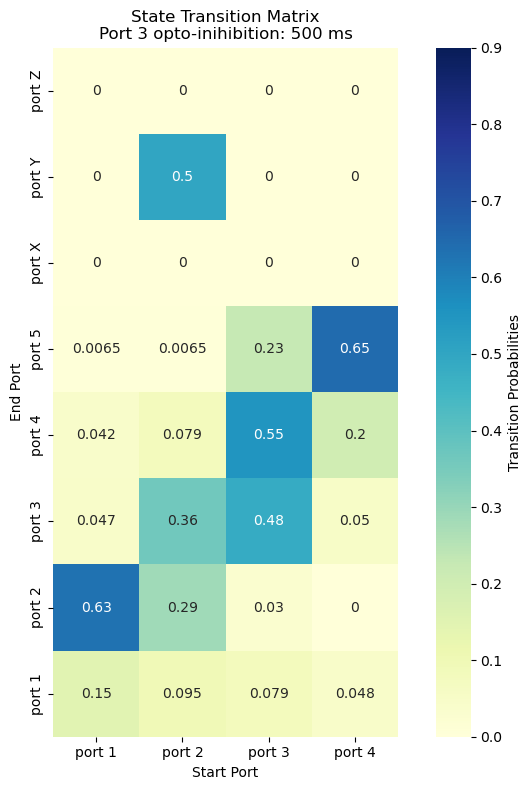

In [132]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_3, normalize=True, display_numbers=True, additional_title= 'Port 3 opto-inihibition: 500 ms')

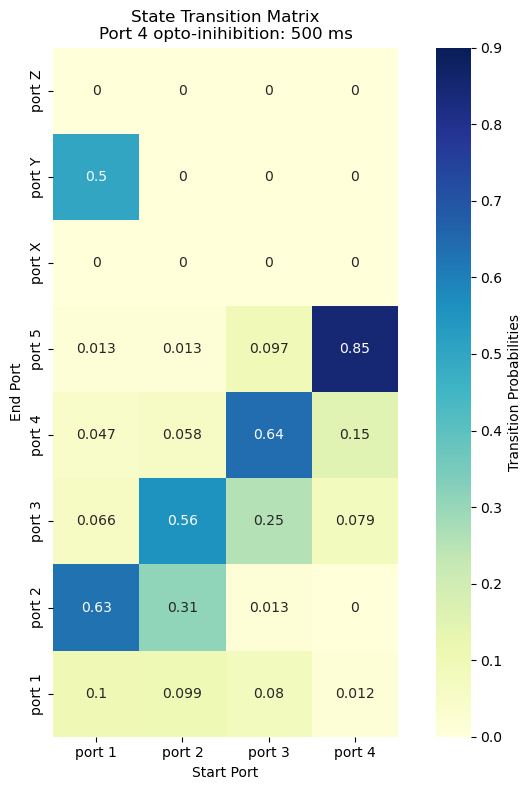

In [133]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_transition_matrix(optostim_port_4, normalize=True, display_numbers=True, additional_title= 'Port 4 opto-inihibition: 500 ms')

In [134]:
control_df.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,opto_stimulated_port,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group
118541,8,2,16,1,6,39.6320,39.6880,40.2369,40.3083,0.5489,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118542,9,2,63,6,3,40.2369,40.3083,40.6669,41.0318,0.3586,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118543,10,2,37,3,7,40.6669,41.0318,41.3113,41.4741,0.2795,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118544,11,2,72,7,2,41.3113,41.4741,42.2490,42.4246,0.7749,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
118545,12,2,21,2,1,42.2490,42.4246,42.7294,42.7822,0.3048,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control


In [135]:
def compute_transition_matrix(df, normalize=False):
    # Create a copy of df
    df_copy = df.copy()
    # Mapping dictionary
    port_mapping = {2: 'port 1', 1: 'port 2', 6: 'port 3', 3: 'port 4', 7: 'port 5',
                    4: 'port X', 5: 'port Y', 8: 'port Z'}

    # Apply mapping to start_poke_port and end_poke_port
    df_copy['start_poke_port'] = df_copy['start_poke_port'].map(port_mapping)
    df_copy['end_poke_port'] = df_copy['end_poke_port'].map(port_mapping)

    # Group by end and start port and count the number of each transition
    transition_counts = df_copy.groupby(['end_poke_port', 'start_poke_port']).size().unstack(fill_value=0)

    # Reorder the columns and rows
    ordered_ports = ['port 1', 'port 2', 'port 3', 'port 4', 'port 5', 'port X', 'port Y', 'port Z']
    transition_counts = transition_counts.reindex(index=ordered_ports[::-1], columns=ordered_ports)

    # Convert to numpy array for easier manipulation and replace np.nan with 0
    transition_counts = np.nan_to_num(transition_counts.values)

    if normalize:
        # Normalize rows to get transition probabilities
        row_sums = transition_counts.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1e-10  # replace 0 sums with a small number to avoid division by zero
        transition_counts = transition_counts / row_sums

    # Convert back to DataFrame
    transition_counts = pd.DataFrame(transition_counts, index=ordered_ports[::-1], columns=ordered_ports)
    return transition_counts


In [136]:
# plot transition matrix

transition_matrix = compute_transition_matrix(control_df, normalize=True)
transition_matrix

,port 1,port 2,port 3,port 4,port 5,port X,port Y,port Z
port Z,0.000000,0.000000,0.090909,0.045455,0.409091,0.136364,0.000000,0.318182
port Y,0.181818,0.431818,0.068182,0.000000,0.022727,0.022727,0.272727,0.000000
port X,0.148148,0.148148,0.148148,0.111111,0.259259,0.037037,0.037037,0.111111
port 5,0.010134,0.004343,0.064529,0.847983,0.072182,0.000000,0.000000,0.000827
port 4,0.047236,0.061307,0.627136,0.174707,0.085595,0.002345,0.000838,0.000838
port 3,0.087340,0.525303,0.252720,0.092228,0.040359,0.000000,0.001892,0.000158
port 2,0.588483,0.301398,0.047651,0.012628,0.048325,0.001010,0.000505,0.000000
port 1,0.150346,0.081633,0.082943,0.040442,0.641827,0.000562,0.001872,0.000374


In [137]:
# find all sequences from a dataframe arranged according to their cumulative_trial_ids

# get all unique cumulative_trial_ids

cumulative_trial_ids = control_df['cumulative_trial_id'].unique()
cumulative_trial_ids.sort()
# cumulative_trial_ids
# access the dataframe at any cumulative trial id

trial_df = control_df[control_df['cumulative_trial_id'] == cumulative_trial_ids[0]].reset_index(drop=True)
trial_df.head()

,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,opto_stimulated_port,training_level,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group
0,8,2,16,1,6,39.6320,39.6880,40.2369,40.3083,0.5489,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
1,9,2,63,6,3,40.2369,40.3083,40.6669,41.0318,0.3586,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
2,10,2,37,3,7,40.6669,41.0318,41.3113,41.4741,0.2795,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
3,11,2,72,7,2,41.3113,41.4741,42.2490,42.4246,0.7749,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control
4,12,2,21,2,1,42.2490,42.4246,42.7294,42.7822,0.3048,...,NaN,50,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control


In [138]:
# print(trial_df)

trial_ids = trial_df['trial_id'].values
transition_type = trial_df['transition_type'].values
start_poke_port = trial_df['start_poke_port'].values
end_poke_port = trial_df['end_poke_port'].values
start_poke_in_timestamp = trial_df['start_poke_in_timestamp'].values
start_poke_out_timestamp = trial_df['start_poke_out_timestamp'].values
end_poke_in_timestamp = trial_df['end_poke_in_timestamp'].values
end_poke_out_timestamp = trial_df['end_poke_out_timestamp'].values
in_in_latency = trial_df['in_in_latency'].values
out_in_latency = trial_df['out_in_latency'].values


print('Trial ids', trial_ids)
print('Transitions', transition_type)
print('Start poke port', start_poke_port)
print('End poke port', end_poke_port)
print('Start poke in time stamp', start_poke_in_timestamp)
print('Start poke out time stamp', start_poke_out_timestamp)
print('End poke in time stamp', end_poke_in_timestamp)
print('End poke out time stamp', end_poke_out_timestamp)
print('In-in latency', in_in_latency)
print('Out-in latency', out_in_latency)


Trial ids [2 2 2 2 2 2 2 2 2 2]
Transitions [16 63 37 72 21 11 16 63 37 72]
Start poke port [1 6 3 7 2 1 1 6 3 7]
End poke port [6 3 7 2 1 1 6 3 7 2]
Start poke in time stamp [39.632  40.2369 40.6669 41.3113 42.249  42.7294 42.8806 43.1898 43.5304
 43.8288]
Start poke out time stamp [39.688  40.3083 41.0318 41.4741 42.4246 42.7822 42.8922 43.2895 43.6235
 46.4946]
End poke in time stamp [40.2369 40.6669 41.3113 42.249  42.7294 42.8806 43.1898 43.5304 43.8288
 47.0936]
End poke out time stamp [40.3083 41.0318 41.4741 42.4246 42.7822 42.8922 43.2895 43.6235 46.4946
 47.2131]
In-in latency [0.6049 0.43   0.6444 0.9377 0.4804 0.1512 0.3092 0.3406 0.2984 3.2648]
Out-in latency [0.5489 0.3586 0.2795 0.7749 0.3048 0.0984 0.2976 0.2409 0.2053 0.599 ]


In [139]:
# copy_df = trial_df.copy().reset_index()
# copy_df['2s_time_filter_out_in'].iloc[4] = 0
# copy_df['2s_time_filter_out_in']

# split trial_df into trial_df_1, trial_df_2, at rows where 2s_time_filter_out_in is False

def split_dataframe(df, column):
    """
    Splits the given DataFrame into multiple DataFrames based on the specified column.
    The DataFrame is split whenever the specified column has a False value.

    Args:
    df (pandas.DataFrame): The DataFrame to be split.
    column (str): The name of the column based on which the DataFrame will be split.

    Returns:
    list: A list containing the resulting DataFrames.
    """

    # Initialize an empty list to store the resulting DataFrames
    df_list = []

    # Initialize an empty DataFrame for the first segment
    df_segment = pd.DataFrame()

    # Iterate over the rows of the input DataFrame
    for index, row in df.iterrows():

        # If the current row in the specified column is True, 
        # add the row to the current segment
        if row[column]:
            df_segment = pd.concat([df_segment, pd.DataFrame(row).T])
        # If the current row in the specified column is False,
        # append the current segment to df_list and start a new segment
        else:
            df_list.append(df_segment)
            df_segment = pd.DataFrame()
            df_segment = pd.concat([df_segment, pd.DataFrame(row).T])

    # If the last segment is not empty, append it to df_list
    if not df_segment.empty:
        df_list.append(df_segment)

    # Return the list of DataFrames
    return df_list

# df_list = split_dataframe(copy_df, '2s_time_filter_out_in')



In [140]:
def generate_transition_lists():
    """
    Generate lists of correct, error, and neutral transitions. 

    Correct transitions follow the sequence 2 -> 1 -> 6 -> 3 -> 7 -> 2, 
    Neutral transitions are those where the start and end ports are the same or transitions to irrelevant ports [4, 5, 8],
    Error transitions are all others.
    
    Returns:
    correct_transitions (list): List of correct transitions.
    error_transitions (list): List of error transitions.
    neutral_transitions (list): List of neutral transitions.
    """

    # Generate all possible transitions from 1-8 to 1-8
    all_transitions = [10*i + j for i in range(1, 9) for j in range(1, 9)]

    # Define the correct sequence
    correct_sequence = [2, 1, 6, 3, 7, 2]

    # Generate correct transitions based on the correct sequence
    correct_transitions = [10*correct_sequence[i] + correct_sequence[i+1] for i in range(len(correct_sequence)-1)]
    # The sequence wraps around, so manually add the last transition to complete the cycle
    correct_transitions.append(72)

    # Generate neutral transitions
    # Neutral transitions start and end at the same port
    same_port_transitions = [11*i for i in range(1, 9)]
    # Neutral transitions also include transitions to irrelevant ports (4, 5, 8)
    irrelevant_port_transitions = [10*i + j for i in [4, 5, 8] for j in range(1, 9)]
    neutral_transitions = same_port_transitions + irrelevant_port_transitions

    # Generate error transitions
    # Error transitions are all others that are not correct or neutral
    error_transitions = list(set(all_transitions) - set(correct_transitions) - set(neutral_transitions))

    return correct_transitions, error_transitions, neutral_transitions

# Call the function to get the transition lists
correct_transitions, error_transitions, neutral_transitions = generate_transition_lists()


def get_repeat_transitions(df):
    """
    Creates a new column 'is_repeat' to indicate if the transition is a repeat.
    A repeat transition is defined as a transition where the start and end ports are the same.

    Args:
    df (pandas.DataFrame): The DataFrame with the transitions data. 
                           The DataFrame should have 'start_poke_port' and 'end_poke_port' columns.

    Returns:
    pandas.Series: A Series with True for repeat transitions and False for others.
    """
    return df['start_poke_port'] == df['end_poke_port']


def get_transition_labels(df):
    """
    Creates a new column 'transition_label' to classify the transition.
    Transitions are classified as 'correct', 'neutral', or 'error' based on predefined lists.
    'correct' transitions are those where 'transition_type' is in the correct_transitions list.
    'neutral' transitions are those where 'transition_type' is in the neutral_transitions list.
    'error' transitions are those where 'transition_type' is in the error_transitions list.

    Args:
    df (pandas.DataFrame): The DataFrame with the transitions data.
                           The DataFrame should have 'transition_type' column.

    Returns:
    pandas.Series: A Series with the transition classification.
    """
    correct_transitions = [21,16,63,37,72]
    error_transitions = [23,24,25,26,27,28,12,13,14,15,17,18,61,62,64,65,67,68,31,32,34,35,36,38]
    neutral_transitions = [11,22,33,66,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,71,73,74,75,76,77,78,81,82,83,84,85,86,87,88]

    transition_labels = pd.Series(['error'] * len(df), index=df.index)

    mask_correct = df['transition_type'].isin(correct_transitions)
    transition_labels[mask_correct] = 'correct'

    mask_neutral = df['transition_type'].isin(neutral_transitions)
    transition_labels[mask_neutral] = 'neutral'

    return transition_labels


trial_df['is_repeat'] = get_repeat_transitions(trial_df)
trial_df['transition_label'] = get_transition_labels(trial_df)

trial_df


,Unnamed: 0,trial_id,transition_type,start_poke_port,end_poke_port,start_poke_in_timestamp,start_poke_out_timestamp,end_poke_in_timestamp,end_poke_out_timestamp,out_in_latency,...,led_intensities_ports_2_3_4_5,reward_amounts_ports_1_2_3_4,cumulative_trial_id,session_id,date,day,animal_id,group,is_repeat,transition_label
0,8,2,16,1,6,39.6320,39.6880,40.2369,40.3083,0.5489,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
1,9,2,63,6,3,40.2369,40.3083,40.6669,41.0318,0.3586,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
2,10,2,37,3,7,40.6669,41.0318,41.3113,41.4741,0.2795,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
3,11,2,72,7,2,41.3113,41.4741,42.2490,42.4246,0.7749,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
4,12,2,21,2,1,42.2490,42.4246,42.7294,42.7822,0.3048,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
5,13,2,11,1,1,42.7294,42.7822,42.8806,42.8922,0.0984,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,True,neutral
6,14,2,16,1,6,42.8806,42.8922,43.1898,43.2895,0.2976,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
7,15,2,63,6,3,43.1898,43.2895,43.5304,43.6235,0.2409,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
8,16,2,37,3,7,43.5304,43.6235,43.8288,46.4946,0.2053,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct
9,17,2,72,7,2,43.8288,46.4946,47.0936,47.2131,0.5990,...,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",13422,36,2023-07-11,Tue,SP112,Control,False,correct


In [141]:
# create the sequence performend by the mouse in the chosen trial

perfect_sequence = '21637'
start_port = perfect_sequence[0]

def get_sequence(df):
    """
    This function extracts the start poke port from the dataframe and returns it as a string, 
    and the in-in latency as a list of numerical values.

    Args:
    df (pandas.DataFrame): The DataFrame with the transitions data. 
                           The DataFrame should have 'start_poke_port' and 'in_in_latency' columns.

    Returns:
    str, list: The first output is a string that contains the 'start_poke_port' values 
               and the second output is a list that contains the 'in_in_latency' numerical values.
    """
    # Convert 'start_poke_port' to string and join all elements into a single string
    start_poke_ports = ''.join(map(str, df['start_poke_port'].tolist()))
    
    # Keep 'in_in_latency' as a list of floats
    in_in_latencies = df['in_in_latency'].tolist()

    return start_poke_ports, in_in_latencies

In [142]:
start_poke_ports, in_in_latencies = get_sequence(trial_df)
print('start_poke_ports', start_poke_ports)
print('in_in_latencies', in_in_latencies)   
print('perfect sequence', perfect_sequence) 


start_poke_ports 1637211637
in_in_latencies [0.6049000000000007, 0.4299999999999997, 0.6443999999999974, 0.9376999999999996, 0.480400000000003, 0.1511999999999957, 0.3092000000000041, 0.3405999999999949, 0.2984000000000009, 3.264800000000001]
perfect sequence 21637


In [143]:
def compute_levenshtein_distance(test_sequence, target_sequence='21637', start_port='2'):
    """
    Compute the Levenshtein distance between the test sequence and the target sequence.

    The Levenshtein distance is the minimum number of single-character edits 
    (insertions, deletions or substitutions) required to change one sequence into the other.

    Parameters:
    test_sequence (str): The sequence to compare against the target. 
                         This sequence should be a string representation of poke ports.
    target_sequence (str): The target sequence. This is the sequence to which we are comparing 
                           the test sequence. Default is '21637'.
    start_port (str): The poke port number at which the sequence starts, represented as a string. Default is '2'.

    Returns:
    float: The Levenshtein distance between the test sequence and the target sequence.
    """

    # Disregard anything before the first occurrence of start_port in the test sequence
    test_sequence = test_sequence[test_sequence.index(start_port):] if start_port in test_sequence else test_sequence

    size_x = len(test_sequence) + 1
    size_y = len(target_sequence) + 1
    matrix = np.zeros((size_x, size_y))

    # Initialize the first row and first column
    matrix[:, 0] = range(size_x)
    matrix[0, :] = range(size_y)

    # Compute the rest of the matrix
    for x in range(1, size_x):
        for y in range(1, size_y):
            if test_sequence[x - 1] == target_sequence[y - 1]:
                matrix[x, y] = min(
                    matrix[x - 1, y] + 1,     # Deletion
                    matrix[x - 1, y - 1],     # Substitution
                    matrix[x, y - 1] + 1      # Insertion
                )
            else:
                matrix[x, y] = min(
                    matrix[x - 1, y] + 1,     # Deletion
                    matrix[x - 1, y - 1] + 1, # Substitution
                    matrix[x, y - 1] + 1      # Insertion
                )

    # The final Levenshtein distance is the value in the bottom right corner of the matrix
    return matrix[size_x - 1, size_y - 1]



print(compute_levenshtein_distance(start_poke_ports, perfect_sequence, start_port))


1.0


Edit distance statistics:
Mean distance: 2.280806979280262
Median distance: 1.0
Min distance: 0.0
Max distance: 20.0
Standard deviation of distances: 2.9228898106099805


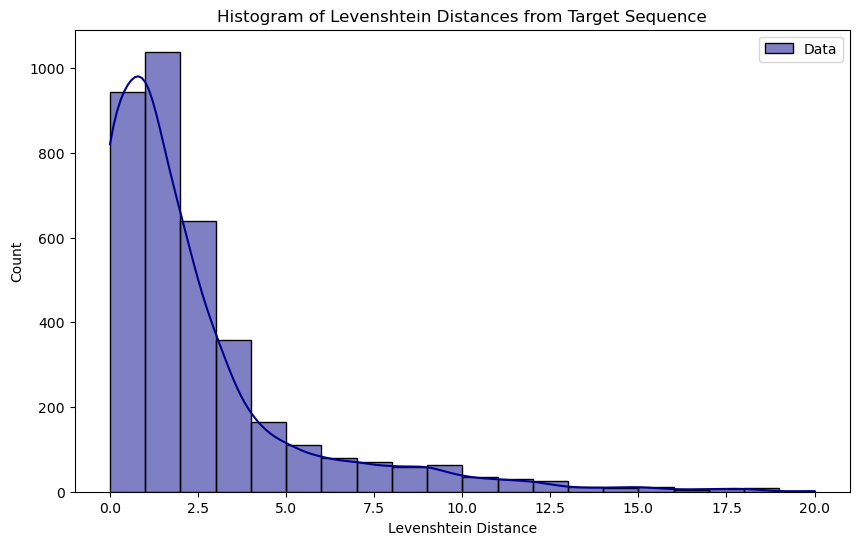

In [144]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_edit_distance_statistics(df, max_edit_distance=20):
    """
    Calculate Levenshtein distances for sequences in a DataFrame and return edit distance statistics.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data for analysis.
            It should have a column 'cumulative_trial_id' representing the trial IDs.

    Returns:
        dict: A dictionary containing statistics and the distances array.
            The dictionary has the following keys:
                - 'mean_distance': The mean Levenshtein distance.
                - 'median_distance': The median Levenshtein distance.
                - 'min_distance': The minimum Levenshtein distance.
                - 'max_distance': The maximum Levenshtein distance.
                - 'std_distance': The standard deviation of Levenshtein distances.
                - 'distances_array': A numpy array containing all the Levenshtein distances.
    """
    # Get all unique cumulative_trial_ids from the DataFrame and sort them
    unique_trial_ids = df['cumulative_trial_id'].unique()
    unique_trial_ids.sort()

    # Create a list to store all sequences
    sequences = []

    # Loop over all unique cumulative_trial_ids and compute the sequences
    for trial_id in unique_trial_ids:
        # Filter the DataFrame for the specific trial_id
        trial_df = df[df['cumulative_trial_id'] == trial_id].reset_index(drop=True)
        # Get the start poke ports and in_in_latencies sequences for this trial_id
        start_poke_ports, in_in_latencies = get_sequence(trial_df)  # Define this function separately
        # Append the sequence to the list as a concatenated string
        sequences.append(''.join(str(p) for p in start_poke_ports))

    # Now we have a list of all sequences and we can compute the Levenshtein distance for all pairs of sequences
    # Create a list to store all Levenshtein distances
    distances = []

    # Loop over each sequence to compute Levenshtein distance
    for sequence in sequences:
        # Compute the Levenshtein distance between the sequence and the target_sequence (target_sequence is not defined in the code)
        distance = compute_levenshtein_distance(sequence)  # Define this function separately
        distances.append(distance)

    # Convert the list to a numpy array for easier calculations
    distance_array = np.array(distances)

    # Discard sequences with an edit distance greater than max_edit_distance
    distance_array = distance_array[distance_array <= max_edit_distance]

    # Calculate statistics
    mean_distance = np.mean(distance_array)
    median_distance = np.median(distance_array)
    min_distance = np.min(distance_array)
    max_distance = np.max(distance_array)
    std_distance = np.std(distance_array)

    # Create the result dictionary
    edit_statistics = {
        'mean_distance': mean_distance,
        'median_distance': median_distance,
        'min_distance': min_distance,
        'max_distance': max_distance,
        'std_distance': std_distance,
        'distances_array': distance_array
    }

    return edit_statistics

optostim_port_1 = opto_df[opto_df['opto_stimulated_port'] == 1]
optostim_port_2 = opto_df[opto_df['opto_stimulated_port'] == 2]
optostim_port_3 = opto_df[opto_df['opto_stimulated_port'] == 3]
optostim_port_4 = opto_df[opto_df['opto_stimulated_port'] == 4]

edit_statistics = get_edit_distance_statistics(control_df)

# Print the statistics for the DataFrame
print("Edit distance statistics:")
print(f"Mean distance: {edit_statistics['mean_distance']}")
print(f"Median distance: {edit_statistics['median_distance']}")
print(f"Min distance: {edit_statistics['min_distance']}")
print(f"Max distance: {edit_statistics['max_distance']}")
print(f"Standard deviation of distances: {edit_statistics['std_distance']}")

# Now, plot the histogram of distances
plt.figure(figsize=(10, 6))
sns.histplot(edit_statistics['distances_array'], bins=20, kde=True, color='darkblue', label='Data')
plt.title("Histogram of Levenshtein Distances from Target Sequence")
plt.xlabel("Levenshtein Distance")
plt.ylabel("Count")
plt.legend()
plt.show()


In [149]:
def plot_edit_distance_histograms(edit_statistics_list, labels, control_bins=50, other_bins=5):
    """
    Plot histograms of Levenshtein distances for multiple DataFrames.

    Parameters:
        edit_statistics_list (list): A list of edit distance statistics dictionaries for each DataFrame.
            Each dictionary should contain 'distances_array' key.
        labels (list): A list of labels for each DataFrame (e.g., ['Port 1', 'Port 2', ...]).
        control_bins (int): Number of bins for the 'control' DataFrame.
        other_bins (int): Number of bins for other DataFrames.
    """
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("Set1", n_colors=len(edit_statistics_list))

    for idx, stats in enumerate(edit_statistics_list):
        distances_array = stats['distances_array']
        if labels[idx] == 'control':
            bins = control_bins
        else:
            bins = other_bins
        sns.kdeplot(data=distances_array, color=colors[idx], label=labels[idx])
        
        # Create a Gaussian kernel density estimate
        kde = gaussian_kde(distances_array)

        # Generate points for the x axis
        x_points = np.linspace(distances_array.min(), distances_array.max(), 500)

        # Evaluate the KDE on these points
        densities = kde.evaluate(x_points)

        # Find the x value that corresponds to the peak of the density
        peak_density_x = x_points[np.argmax(densities)]

        # Plot a vertical line at the peak
        plt.axvline(peak_density_x, color=colors[idx], linestyle='--', alpha=0.5)
     
    plt.title("Histogram of Levenshtein Distances from Target Sequence")
    plt.xlabel("Levenshtein Distance")
    plt.ylabel("Density")
    plt.legend()
    sns.despine()
    plt.gca().set_aspect('auto')

    # Find the first 99 percentile of the data and set xlim accordingly
    percentile_99 = np.percentile(np.concatenate([stats['distances_array'] for stats in edit_statistics_list]), 99)
    plt.xlim(0, percentile_99)

    # Switch off the grid
    plt.grid(False)

    plt.show()




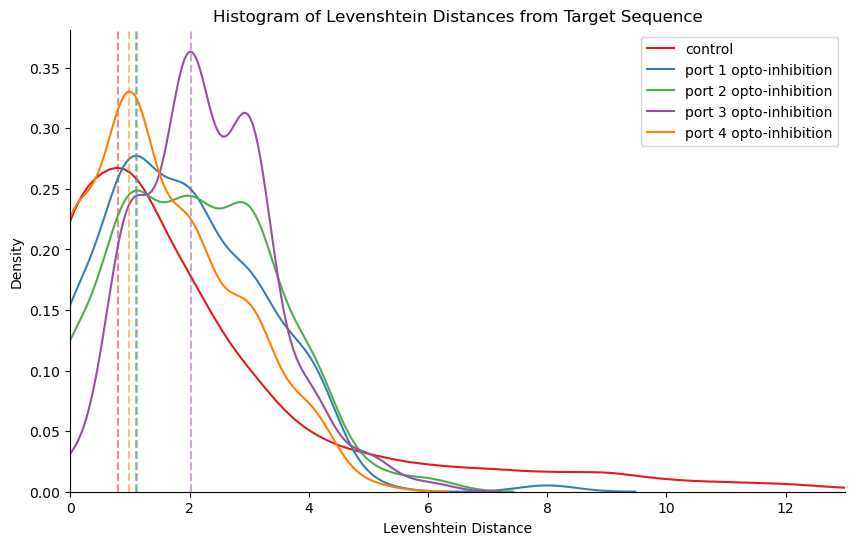

In [151]:
# Calculate edit statistics for each DataFrame
edit_statistics_control = get_edit_distance_statistics(control_df)
edit_statistics_port_1_opto = get_edit_distance_statistics(optostim_port_1)
edit_statistics_port_2_opto = get_edit_distance_statistics(optostim_port_2)
edit_statistics_port_3_opto = get_edit_distance_statistics(optostim_port_3)
edit_statistics_port_4_opto = get_edit_distance_statistics(optostim_port_4)

# Create a list of edit statistics and port labels
edit_statistics_list = [edit_statistics_control, edit_statistics_port_1_opto, edit_statistics_port_2_opto, edit_statistics_port_3_opto, edit_statistics_port_4_opto]
labels = ['control', 'port 1 opto-inhibition', 'port 2 opto-inhibition', 'port 3 opto-inhibition', 'port 4 opto-inhibition']

# Plot the histograms for all DataFrames in the same plot
plot_edit_distance_histograms(edit_statistics_list, labels)



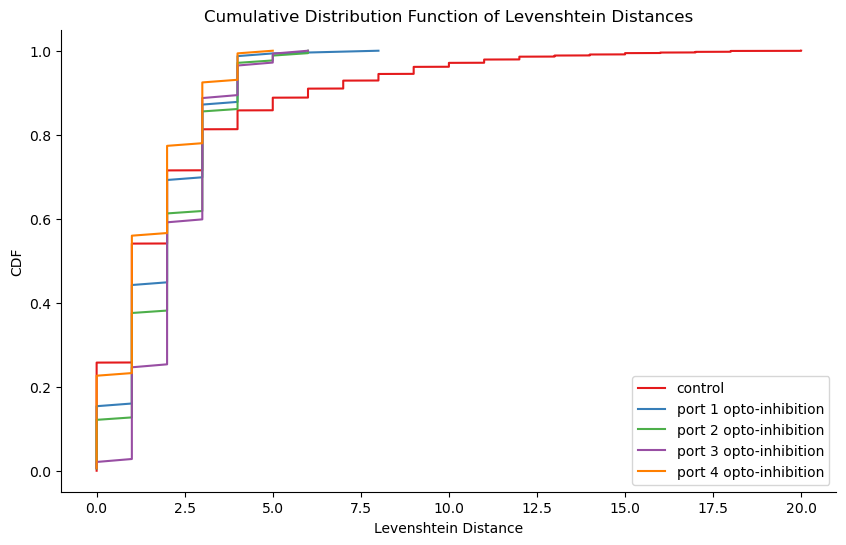

K-S statistic between control and port 1 opto-inhibition: 0.13
P-value: 0.01
K-S statistic between control and port 2 opto-inhibition: 0.17
P-value: 0.00
K-S statistic between control and port 3 opto-inhibition: 0.29
P-value: 0.00
K-S statistic between control and port 4 opto-inhibition: 0.14
P-value: 0.01
K-S statistic between port 1 opto-inhibition and port 2 opto-inhibition: 0.08
P-value: 0.64
K-S statistic between port 1 opto-inhibition and port 3 opto-inhibition: 0.20
P-value: 0.01
K-S statistic between port 1 opto-inhibition and port 4 opto-inhibition: 0.12
P-value: 0.20
K-S statistic between port 2 opto-inhibition and port 3 opto-inhibition: 0.13
P-value: 0.13
K-S statistic between port 2 opto-inhibition and port 4 opto-inhibition: 0.18
P-value: 0.01
K-S statistic between port 3 opto-inhibition and port 4 opto-inhibition: 0.31
P-value: 0.00


In [152]:
def plot_cdfs_and_perform_ks(edit_statistics_list, labels):
    """
    Plot CDFs of Levenshtein distances for multiple DataFrames and perform KS test between each pair of DataFrames.

    Parameters:
        edit_statistics_list (list): A list of edit distance statistics dictionaries for each DataFrame.
            Each dictionary should contain 'distances_array' key.
        labels (list): A list of labels for each DataFrame (e.g., ['Port 1', 'Port 2', ...]).
    """
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("Set1", n_colors=len(edit_statistics_list))

    for idx, stats in enumerate(edit_statistics_list):
        distances_array = stats['distances_array']
        ecdf = ECDF(distances_array) # Calculate ECDF
        plt.plot(ecdf.x, ecdf.y, color=colors[idx], label=labels[idx])

    plt.title("Cumulative Distribution Function of Levenshtein Distances")
    plt.xlabel("Levenshtein Distance")
    plt.ylabel("CDF")
    plt.legend()
    sns.despine()
    plt.gca().set_aspect('auto')
    plt.show()

    # Perform KS test between each pair of dataframes and print the results
    for i in range(len(edit_statistics_list)):
        for j in range(i + 1, len(edit_statistics_list)):
            ks_stat, p_value = ks_2samp(edit_statistics_list[i]['distances_array'], 
                                        edit_statistics_list[j]['distances_array'])
            print(f"K-S statistic between {labels[i]} and {labels[j]}: {ks_stat:.2f}")
            print(f"P-value: {p_value:.2f}")

# Calculate edit statistics for each DataFrame
edit_statistics_control = get_edit_distance_statistics(control_df)
edit_statistics_port_1_opto = get_edit_distance_statistics(optostim_port_1)
edit_statistics_port_2_opto = get_edit_distance_statistics(optostim_port_2)
edit_statistics_port_3_opto = get_edit_distance_statistics(optostim_port_3)
edit_statistics_port_4_opto = get_edit_distance_statistics(optostim_port_4)

# Create a list of edit statistics and port labels
edit_statistics_list = [edit_statistics_control, edit_statistics_port_1_opto, edit_statistics_port_2_opto, edit_statistics_port_3_opto, edit_statistics_port_4_opto]
labels = ['control', 'port 1 opto-inhibition', 'port 2 opto-inhibition', 'port 3 opto-inhibition', 'port 4 opto-inhibition']

# Plot the CDFs for all DataFrames and perform KS tests
plot_cdfs_and_perform_ks(edit_statistics_list, labels)
